# Importations de module necessaires

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyse des donnees COVID

In [13]:
#importation des donnees
covid_data = pd.read_csv('covid.csv')
covid_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [21]:
#Informations sur le jeu de donnees
display(covid_data.info())
display(covid_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

None

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [35]:
# Calcul du pourcentage des valeurs nulles
percent_null_values = round(covid_data.isna().sum().sum() / len(covid_data), 3)
print(f"Le pourcentage des valeurs nulles dans ce jeu de donnee est de {percent_null_values}%")

Le pourcentage des valeurs nulles dans ce jeu de donnee est de 0.055%


In [43]:
# Le pourcentage des valeurs nulles n'est pas important donc on va les supprime
covid_data.dropna(inplace = True) # On les supprime directement du jeu de donnes original avec l'argument "inplace = True" on peut verifier en executant la cellule precedante

In [67]:
# Pays avec le plus grand nombres de cas
data_by_contries = covid_data.groupby('countriesAndTerritories')[['cases', 'deaths']].sum().sort_values('deaths', ascending = False) # On groupe les donnees par pays, puis selectionne les colonnes 'cases' et 'deaths' et on effectue la somme sur ces colonnes puis le trier par ordre decroissant
data_by_contries

,cases,deaths
countriesAndTerritories,,
United_States_of_America,16256754,299177
Brazil,6901952,181402
India,9884100,143355
Mexico,1250044,113953
Italy,1843712,64520
...,...,...
Laos,30,0
Faroe_Islands,510,0
Falkland_Islands_(Malvinas),8,0


In [73]:
#Pays avec Taux de mortalite eleve
data_by_contries['mortality_rate'] = (data_by_contries['deaths'] / data_by_contries['cases']) * 100
data_by_contries.sort_values('mortality_rate', ascending = False)

,cases,deaths,mortality_rate
countriesAndTerritories,,,
Yemen,2082,606,29.106628
Montserrat,8,1,12.500000
Mexico,1250044,113953,9.115919
Isle_of_Man,305,25,8.196721
Ecuador,202110,13875,6.865073
...,...,...,...
Cambodia,359,0,0.000000
Greenland,9,0,0.000000
Dominica,73,0,0.000000


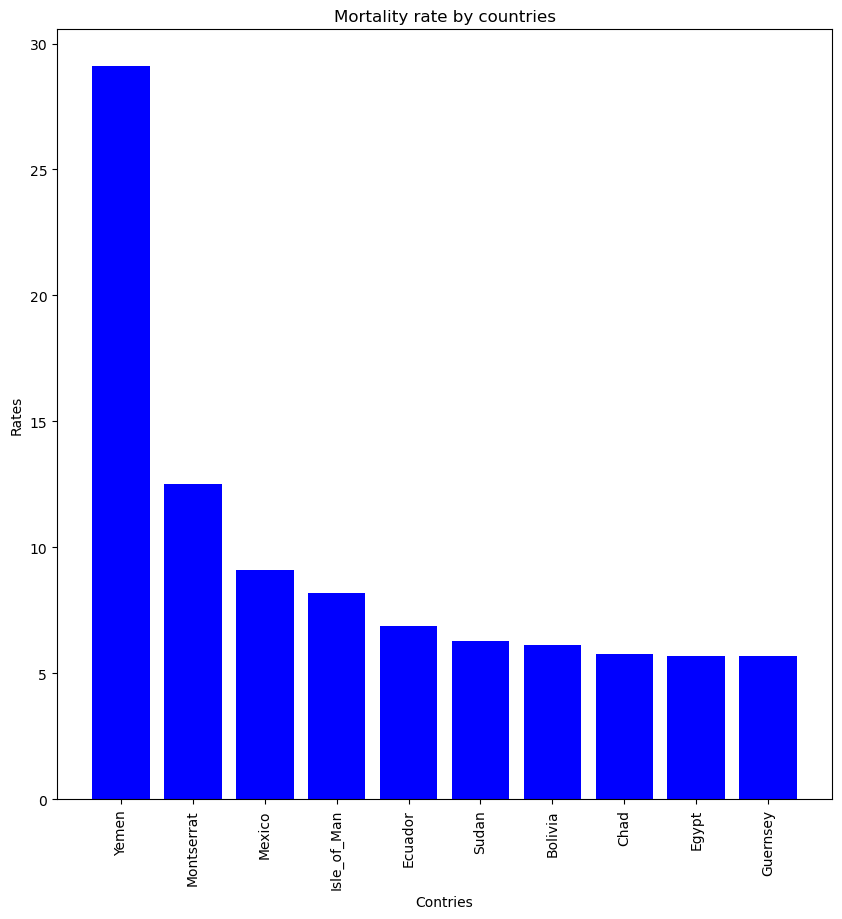

In [179]:
# Graphe
plt.figure(figsize = (10, 10))
mask = data_by_contries.sort_values('mortality_rate', ascending = False).head(10)
plt.bar(mask.index, mask['mortality_rate'], color = 'blue')
plt.xlabel('Contries')
plt.ylabel('Rates')
plt.title('Mortality rate by countries')
plt.xticks(rotation = 90)
plt.show()

# 

In [171]:
senegal_data = covid_data[covid_data.countriesAndTerritories == 'Senegal']
senegal_data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
49232,14/12/2020,14,12,2020,78,0,Senegal,SN,SEN,16296362.0,Africa,6.136339
49233,13/12/2020,13,12,2020,104,4,Senegal,SN,SEN,16296362.0,Africa,5.952249
49234,12/12/2020,12,12,2020,127,2,Senegal,SN,SEN,16296362.0,Africa,5.596341
49235,11/12/2020,11,12,2020,101,2,Senegal,SN,SEN,16296362.0,Africa,4.945889
49236,10/12/2020,10,12,2020,112,1,Senegal,SN,SEN,16296362.0,Africa,4.528618
...,...,...,...,...,...,...,...,...,...,...,...,...
49494,27/03/2020,27,3,2020,6,0,Senegal,SN,SEN,16296362.0,Africa,0.607498
49495,26/03/2020,26,3,2020,13,0,Senegal,SN,SEN,16296362.0,Africa,0.582952
49496,25/03/2020,25,3,2020,7,0,Senegal,SN,SEN,16296362.0,Africa,0.509316
49497,24/03/2020,24,3,2020,12,0,Senegal,SN,SEN,16296362.0,Africa,0.478634
